<a href="https://colab.research.google.com/github/jeremilev/comp472-project/blob/main/472_Assignment1_JimmyID_40133776_TimID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 472 - Assignment 1 by Jérémi Léveillé ID: 40133776

In [45]:
# Import librairies for assignment
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.utils.multiclass import unique_labels

# Question 1

In [46]:
# Download Dataset 1 'abalone.csv' from Google Drive
!gdown https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
# Download Dataset 2 'penguins.csv' from Google Drive
!gdown  https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL


Downloading...
From: https://drive.google.com/uc?id=1Jc16RBC6uuCsoP9RdKYcsg0n_bsyqwP2
To: /content/abalone.csv
100% 203k/203k [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yqKelS2N6Qhuk0ymj9KFSaOnIYHZE7QL
To: /content/penguins.csv
100% 13.1k/13.1k [00:00<00:00, 21.5MB/s]


# Question 2

## 1.

### (a)

In [47]:
# Load Dataset 1 and 2
abalone_data = pd.read_csv('/content/abalone.csv')
penguins_data = pd.read_csv('/content/penguins.csv')

#### i.

In [48]:
# peek at dataset 1
penguins_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


In [49]:
# METHOD 1: Convert the features 'island' and 'sex' into 1-hot vectors or 'dummy' variables.
# We name the onehot encoded penguins_data using method 1: penguins_encoded1
penguins_encoded1 = pd.get_dummies(penguins_data, columns=['island'])
penguins_encoded1 = pd.get_dummies(penguins_encoded1, columns=['sex'])

# Verify the string columns are swapped with the onehot encoded vectors
penguins_encoded1.head(10)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1
5,Adelie,38.9,17.8,181,3625,0,0,1,1,0
6,Adelie,39.2,19.6,195,4675,0,0,1,0,1
7,Adelie,41.1,17.6,182,3200,0,0,1,1,0
8,Adelie,38.6,21.2,191,3800,0,0,1,0,1
9,Adelie,34.6,21.1,198,4400,0,0,1,0,1


In [50]:
# METHOD 2: Convert the features 'island' and 'sex' manually
# Convert both columns to numpy arrays to use np.where()
np_island_col = penguins_data['island'].to_numpy()
np_sex_col = penguins_data['sex'].to_numpy()

# For island, replace 'Torgersen' = 0, 'Biscoe' = 1, 'Dream' = 2
np_island_col = np.where(np_island_col == 'Torgersen', 0, np_island_col)
np_island_col = np.where(np_island_col == 'Biscoe', 1, np_island_col)
np_island_col = np.where(np_island_col == 'Dream', 2, np_island_col)

# For sex, replace 'MALE' = 0, 'FEMALE' = 1
np_sex_col = np.where(np_sex_col == 'MALE',0,1)
# We name the encoded penguins_data using method 2: penguins_encoded2
penguins_encoded2 = penguins_data.copy(deep=True)

# Replace respective column by their encoded version
penguins_encoded2['island'] = np_island_col
penguins_encoded2['sex'] = np_sex_col

# Verify the string columns are correctly swapped with the encoded columns
penguins_encoded2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181,3750,0
1,Adelie,0,39.5,17.4,186,3800,1
2,Adelie,0,40.3,18.0,195,3250,1
3,Adelie,0,36.7,19.3,193,3450,1
4,Adelie,0,39.3,20.6,190,3650,0
...,...,...,...,...,...,...,...
328,Gentoo,1,47.2,13.7,214,4925,1
329,Gentoo,1,46.8,14.3,215,4850,1
330,Gentoo,1,50.4,15.7,222,5750,0
331,Gentoo,1,45.2,14.8,212,5200,1


### (b)

In [51]:
# peek at dataset 2
abalone_data.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
5,I,0.495,0.375,0.120,0.5890,0.3075,0.1215,0.1405,8
6,I,0.255,0.190,0.070,0.0815,0.0280,0.0160,0.0310,5
7,M,0.670,0.525,0.180,1.4915,0.7280,0.3430,0.3810,9
8,F,0.595,0.430,0.210,1.5245,0.6530,0.3960,0.4100,11
9,F,0.535,0.420,0.130,0.6990,0.3125,0.1565,0.2035,8


In [52]:
# As shown above, if we are to use 'Type' as a categorical input feature,
# we would need to encode the column 'Type' since it is of type 'string'.
# However, since it is the prediction label, we don't need to do so.

## 2.

Penguin percentage per species:
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

Abalone percentage per sex type:
M    0.365813
I    0.321283
F    0.312904
Name: Type, dtype: float64


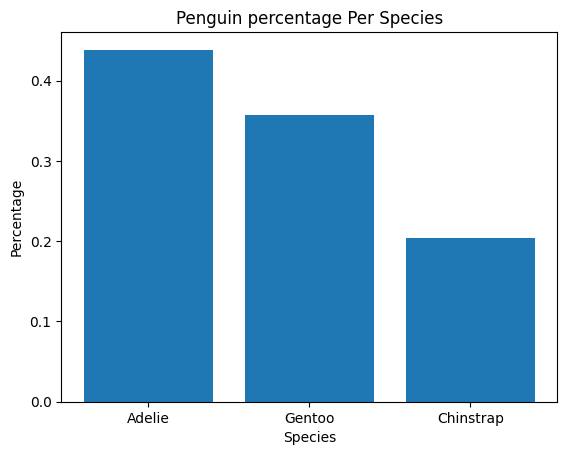

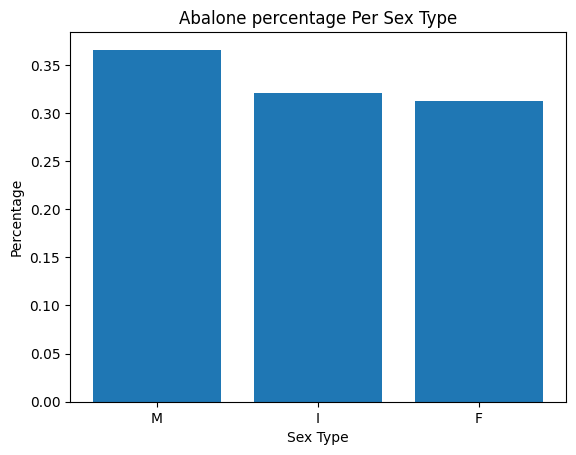

In [53]:
# Plot percentage of the instances in each output class and store the graphic in files called penguin-classes.gif and abalone-classes.gif
# How many belong to each species in the penguins dataset?
penguin_species_count = penguins_data['species'].value_counts()
penguin_species_percentage = penguin_species_count/len(penguins_data)

# How many belong to each sex type in the abalone dataset?
abalone_type_count = abalone_data['Type'].value_counts()
abalone_type_percentage = abalone_type_count/len(abalone_data)

print("Penguin percentage per species:")
print(penguin_species_percentage)
print()
print("Abalone percentage per sex type:")
print(abalone_type_percentage)

# Let's plot two bar graphs containing these values
# Penguins bar graph
plt.bar(penguin_species_percentage.index, penguin_species_percentage.values)
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.title('Penguin percentage Per Species')
plt.show()

# Abalone bar graph
plt.bar(abalone_type_percentage.index, abalone_type_percentage.values)
plt.xlabel('Sex Type')
plt.ylabel('Percentage')
plt.title('Abalone percentage Per Sex Type')
plt.show()


## 3.

In [54]:
# Split both datasets into train and test sets.
# Convert datasets to numpy arrays
np_penguin_data = penguins_encoded1.to_numpy()
np_abalone_data = abalone_data.to_numpy()

# Slice data to get labels in p_y and features in p_X
p_X = np_penguin_data[:,1:]
p_y = np_penguin_data[:,0]

# Slice data to get labels in a_y and features in a_X
a_X = np_abalone_data[:,1:]
a_y = np_abalone_data[:,0]

# Split data into train and test sets using the default parameter values.
p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

## 4.

### (a)

In [55]:
# Create Decision Tree object and train it on training sets

def create_base_DT_classifiers(X_train, Y_train) -> tree.DecisionTreeClassifier:
  base_DT = tree.DecisionTreeClassifier()
  base_DT.fit(X_train, Y_train)
  return base_DT

base_DT_penguins = create_base_DT_classifiers(p_X_train,p_y_train)

base_DT_abalone = create_base_DT_classifiers(a_X_train,a_y_train)

[Text(0.640625, 0.9166666666666666, 'x[2] <= 206.0\ngini = 0.635\nsamples = 249\nvalue = [111, 49, 89]'),
 Text(0.46875, 0.75, 'x[0] <= 44.65\ngini = 0.421\nsamples = 155\nvalue = [109, 45, 1]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <= 42.35\ngini = 0.085\nsamples = 113\nvalue = [108, 5, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 16.75\ngini = 0.019\nsamples = 103\nvalue = [102, 1, 0]'),
 Text(0.125, 0.25, 'x[0] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 95\nvalue = [95, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.625, 0.5833333333333334, 'x[4] <= 0.5\ngini = 0.092\n

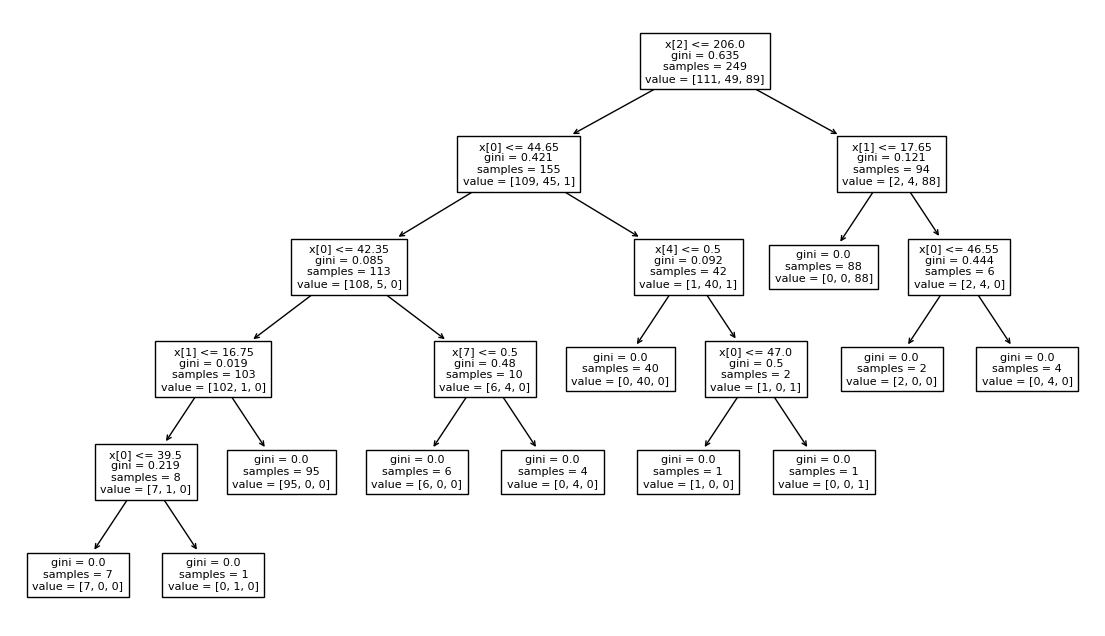

In [56]:
#Plot penguins tree
plt.figure(figsize=(14,8))
tree.plot_tree(base_DT_penguins, fontsize = 8)

[Text(0.5, 0.875, 'x[5] <= 0.144\ngini = 0.664\nsamples = 3132\nvalue = [974, 987, 1171]'),
 Text(0.25, 0.625, 'x[7] <= 8.5\ngini = 0.542\nsamples = 1303\nvalue = [206, 807, 290]'),
 Text(0.125, 0.375, 'x[6] <= 0.128\ngini = 0.385\nsamples = 840\nvalue = [67, 642, 131]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[0] <= 0.512\ngini = 0.665\nsamples = 463\nvalue = [139, 165, 159]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[3] <= 0.99\ngini = 0.582\nsamples = 1829\nvalue = [768, 180, 881]'),
 Text(0.625, 0.375, 'x[5] <= 0.162\ngini = 0.635\nsamples = 687\nvalue = [229, 143, 315]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[4] <= 0.873\ngini = 0.531\nsamples = 1142\nvalue = [539, 37, 566]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

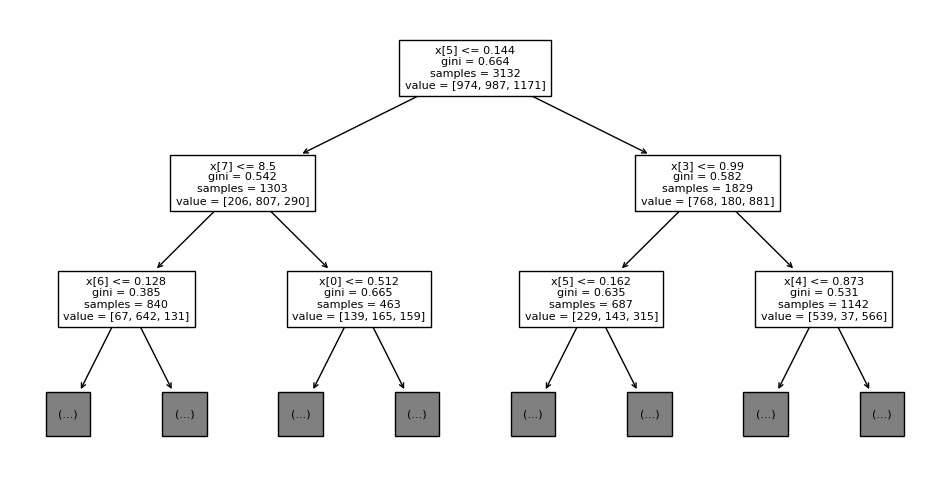

In [57]:
# Plot abalones tree
plt.figure(figsize=(12,6))
tree.plot_tree(base_DT_abalone, max_depth= 2, fontsize = 8)

### (b)

In [58]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'

def create_top_DT_classifier(X_train, Y_train) -> GridSearchCV:
  # The DT object
  DT =  tree.DecisionTreeClassifier()
  # The parameters in question
  parameters = {'criterion': ('gini','entropy'), 'max_depth': [3,10, None], 'min_samples_split': [2,6,12]}
  # The GridSearch Object
  top_DT = GridSearchCV(DT, parameters)
  # The training
  top_DT.fit(X_train,Y_train)
  return top_DT

# For the penguins:
top_DT_penguins = create_top_DT_classifier(p_X_train,p_y_train)

# For the abalone:
top_DT_abalone = create_top_DT_classifier(a_X_train,a_y_train)

[Text(0.640625, 0.9166666666666666, 'x[2] <= 206.0\ngini = 0.635\nsamples = 249\nvalue = [111, 49, 89]'),
 Text(0.46875, 0.75, 'x[0] <= 44.65\ngini = 0.421\nsamples = 155\nvalue = [109, 45, 1]'),
 Text(0.3125, 0.5833333333333334, 'x[0] <= 42.35\ngini = 0.085\nsamples = 113\nvalue = [108, 5, 0]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 16.75\ngini = 0.019\nsamples = 103\nvalue = [102, 1, 0]'),
 Text(0.125, 0.25, 'x[0] <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 95\nvalue = [95, 0, 0]'),
 Text(0.4375, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.625, 0.5833333333333334, 'x[4] <= 0.5\ngini = 0.092\n

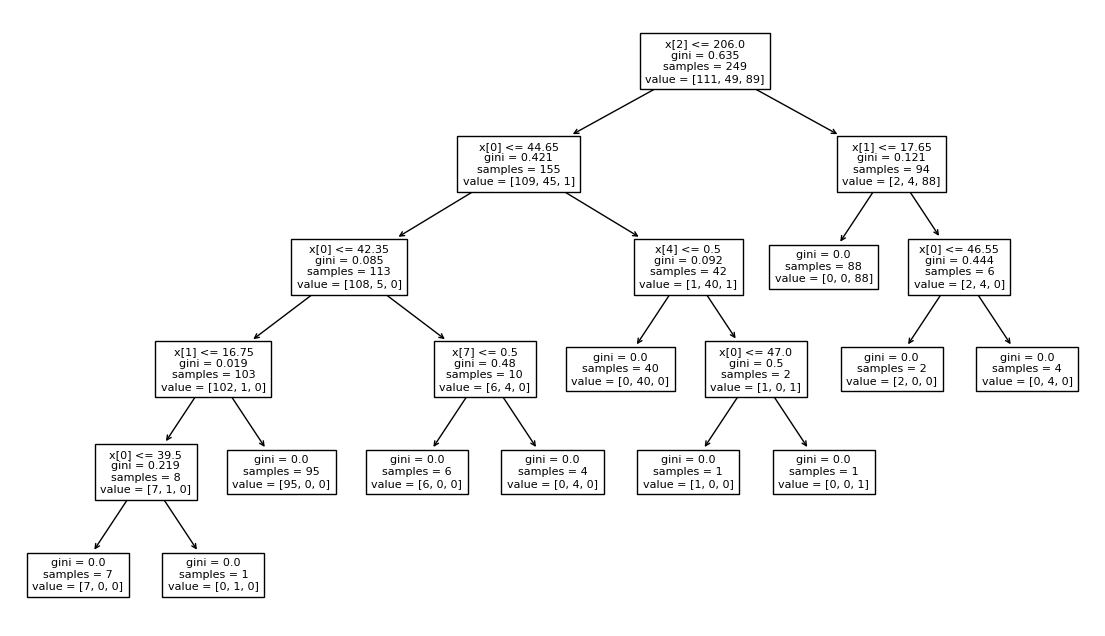

In [59]:
#Plot penguins tree
plt.figure(figsize=(14,8))
tree.plot_tree(base_DT_penguins, fontsize = 8)

[Text(0.5173267326732673, 0.9285714285714286, 'x[5] <= 0.144\ngini = 0.664\nsamples = 3132\nvalue = [974, 987, 1171]'),
 Text(0.2636138613861386, 0.7857142857142857, 'x[7] <= 8.5\ngini = 0.542\nsamples = 1303\nvalue = [206, 807, 290]'),
 Text(0.1311881188118812, 0.6428571428571429, 'x[6] <= 0.128\ngini = 0.385\nsamples = 840\nvalue = [67, 642, 131]'),
 Text(0.06435643564356436, 0.5, 'x[7] <= 6.5\ngini = 0.296\nsamples = 624\nvalue = [31, 517, 76]'),
 Text(0.039603960396039604, 0.35714285714285715, 'x[5] <= 0.109\ngini = 0.205\nsamples = 310\nvalue = [9, 275, 26]'),
 Text(0.019801980198019802, 0.21428571428571427, 'x[5] <= 0.059\ngini = 0.191\nsamples = 306\nvalue = [7, 274, 25]'),
 Text(0.009900990099009901, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0297029702970297, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0594059405940594, 0.21428571428571427, 'x[2] <= 0.12\ngini = 0.625\nsamples = 4\nvalue = [2, 1, 1]'),
 Text(0.04950495049504951, 0.07142857142857142, '\n  (...)  \n'),
 T

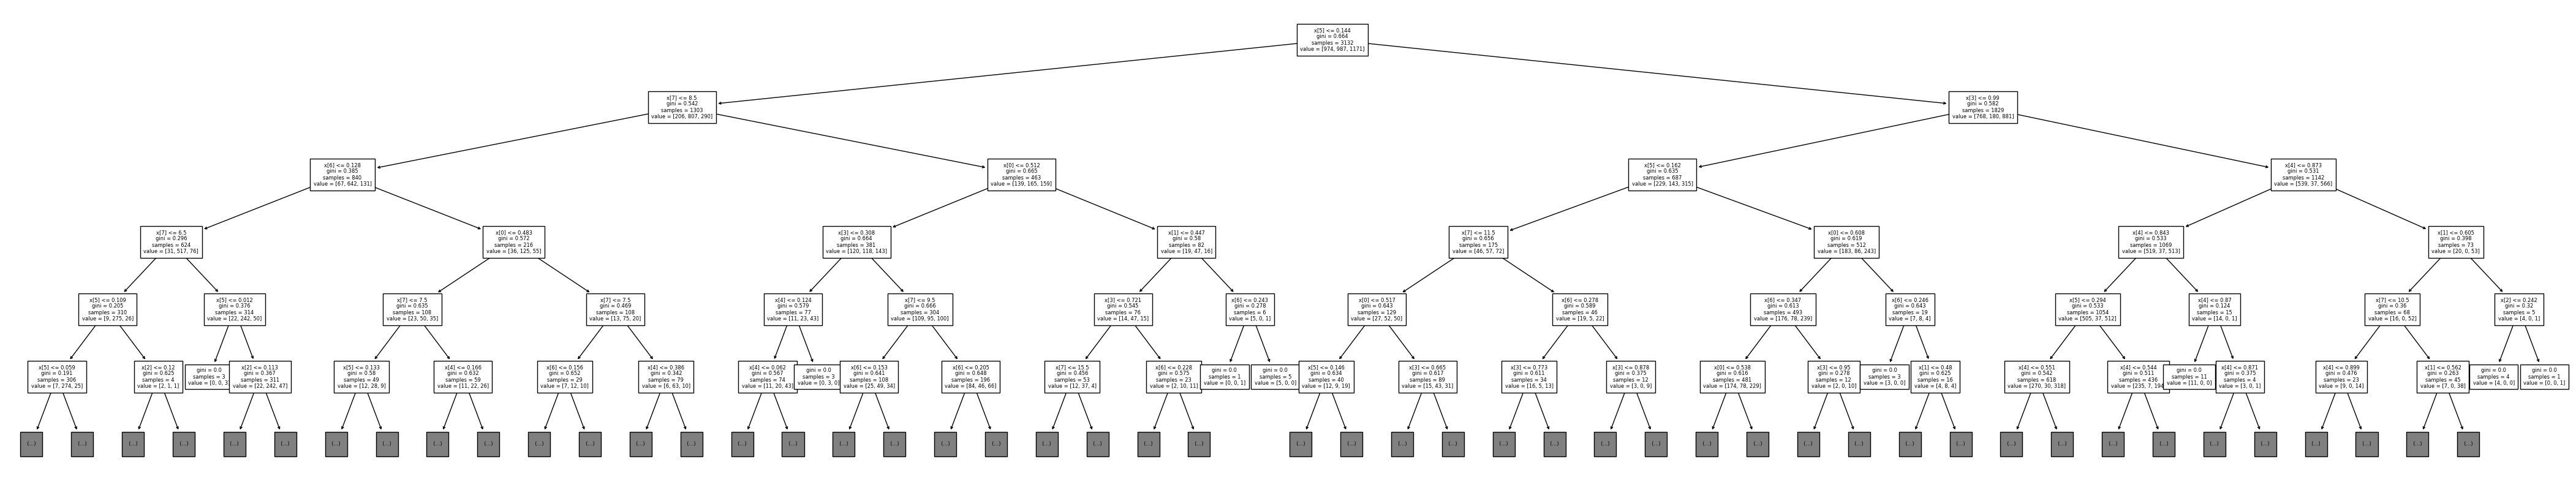

In [60]:
# Plot abalone tree
plt.figure(figsize=(54,10))
tree.plot_tree(base_DT_abalone, max_depth= 5, fontsize = 6)

### (c)

In [61]:
# Train a base MLP on the penguins and abalone datasets with:
# 2 hidden layers, 100 neurons each, sigmoid and logistic activation functions and SGD.

def create_base_MLP_classifier(X_train, Y_train) -> MLPClassifier:
  base_MLP = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic', solver='sgd')
  base_MLP = base_MLP.fit(X_train,Y_train)
  return base_MLP

#TODO: create different training sets
base_MLP_penguins = create_base_MLP_classifier(p_X_train,p_y_train)

base_MLP_abalone = create_base_MLP_classifier(a_X_train,a_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### (d)

In [62]:
# Use GridSearchCV to find the best hyperparameters for 'criterion', 'max_depth', and 'min_samples_split'

def create_top_MLP_classifier(X_train,Y_train):
  # The MLP object
  MLP =  MLPClassifier()
  # The parameters in question
  parameters = {'activation': ['logistic', 'tanh','relu'], 'hidden_layer_sizes': [(10,10,10), (30,50)], 'solver': ['adam', 'sgd']}
  # The GridSearch Object
  top_MLP = GridSearchCV(MLP, parameters)
  # The training
  top_MLP.fit(X_train,Y_train)
  return top_MLP

# For the penguins:
top_MLP_penguins = create_top_MLP_classifier(p_X_train,p_y_train)

# For the abalones:
top_MLP_abalones = create_top_MLP_classifier(a_X_train,a_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

## 5.

### (a)

In [63]:
p_y_pred  = base_DT_penguins.predict(p_X_test)

#A)
base_dt_params = base_DT_penguins.get_params()
base_dt_penguins_info = "Base Decision Tree (criterion: " + str(base_dt_params.get('criterion')) + "---max_depth: " + str(base_dt_params.get('max_depth')) + "---min_samples_split: " + str(base_dt_params.get('min_samples_split')) + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, p_y_pred), columns=column, index=indices)
print("Confusion Matrix:\n", table)
#print("\nBase DT Confusion Maxtrix for Penguins:\n", confusion_matrix(p_y_test, p_y_pred))


#C) Precision, Recall and F1_measure
penguin_report = classification_report(p_y_test, p_y_pred)
print("\nBase DT Classification_report for Penguins:\n", penguin_report)

penguin_report = classification_report(p_y_test, p_y_pred, output_dict=True)
#print("\nBase DT Classification_report for Penguins:\n", penguin_report)
#print(penguin_report.get('Adelie',{}).get('f1-score'))

BaseDT_Adelie_precision = penguin_report.get('Adelie',{}).get('precision')
BaseDT_Adelie_recall =    penguin_report.get('Adelie',{}).get('recall')
BaseDT_Adelie_f1score =   penguin_report.get('Adelie',{}).get('f1-score')

BaseDT_Chinstrap_precision =  penguin_report.get('Chinstrap',{}).get('precision')
BaseDT_Chinstrap_recall =     penguin_report.get('Chinstrap',{}).get('recall')
BaseDT_Chinstrap_f1score =    penguin_report.get('Chinstrap',{}).get('f1-score')

BaseDT_Gentoo_precision = penguin_report.get('Gentoo',{}).get('precision')
BaseDT_Gentoo_recall =    penguin_report.get('Gentoo',{}).get('recall')
BaseDT_Gentoo_f1score =   penguin_report.get('Gentoo',{}).get('f1-score')


text = "\nBase DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(BaseDT_Adelie_precision)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_precision)
text += "\nGentoo:      " + str(BaseDT_Gentoo_precision)

text += "\n\n=Recall=\nAdelie:      " + str(BaseDT_Adelie_recall)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_recall)
text += "\nGentoo:      " + str(BaseDT_Gentoo_recall)

text += "\n\n=F1-score=\nAdelie:      " + str(BaseDT_Adelie_f1score)
text += "\nChinstrap:   " + str(BaseDT_Chinstrap_f1score)
text += "\nGentoo:      " + str(BaseDT_Gentoo_f1score)




#D) Accuracy, macro-average F1m weighted-average F1 of the model
BaseDT_p_accuracy = penguin_report.get('accuracy',{})
BaseDT_macroavg_precision = penguin_report.get('macro avg',{}).get('precision')
BaseDT_macroavg_recall =    penguin_report.get('macro avg',{}).get('recall')
BaseDT_macroavg_f1score =   penguin_report.get('macro avg',{}).get('f1-score')

BaseDT_weightedavg_precision =  penguin_report.get('weighted avg',{}).get('precision')
BaseDT_weightedavg_recall =     penguin_report.get('weighted avg',{}).get('recall')
BaseDT_weightedavg_f1score =    penguin_report.get('weighted avg',{}).get('f1-score')

text += "\n\nAccuracy:     " + str(BaseDT_p_accuracy)
text += "\n\n=Precision=\nMacro avg:       " + str(BaseDT_macroavg_precision)
text += "\nWeighted avg:    " + str(BaseDT_weightedavg_precision)

text += "\n\n=Recall=\nMacro avg:     " + str(BaseDT_macroavg_recall)
text += "\nWeighted avg:  " + str(BaseDT_weightedavg_recall)

text += "\n\n=F1-Score=\nMacro avg:     " + str(BaseDT_macroavg_f1score)
text += "\nWeighted avg:  " + str(BaseDT_weightedavg_f1score)

print(text)



Confusion Matrix:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  33                   2                0
ActualChinstrap                0                  19                0
ActualGentoo                   0                   0               30

Base DT Classification_report for Penguins:
               precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        35
   Chinstrap       0.90      1.00      0.95        19
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.97        84
weighted avg       0.98      0.98      0.98        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      1.0
Chinstrap:   0.9047619047619048
Gentoo:      1.0

=Recall=
Adelie:      0.9428571428571428
Chinstrap:   1.0
Gentoo:      1.0

=F1-score=
Adelie:      0.9705882352941176
Chinstrap:   0.9500000000000001


In [65]:
a_y_pred  = base_DT_abalone.predict(a_X_test)

#A)
base_dt_params = base_DT_abalone.get_params()
base_dt_abalone_info = "Base Decision Tree (criterion: " + str(base_dt_params.get('criterion')) + "---max_depth: " + str(base_dt_params.get('max_depth')) + "---min_samples_split: " + str(base_dt_params.get('min_samples_split')) + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, a_y_pred), columns=column, index=indices)
print("Base DT Confusion Matrix for Abalones:\n", table)

print("Confusion Matrix:\n", confusion_matrix(a_y_test, a_y_pred))


#C) Precision, Recall and F1_measure
print("\nBase DT Classification Report for Abalones:\n",classification_report(a_y_test, a_y_pred))
abalone_report = classification_report(a_y_test, a_y_pred, output_dict=True)

BaseDT_F_precision =  abalone_report.get('F',{}).get('precision')
BaseDT_F_recall =     abalone_report.get('F',{}).get('recall')
BaseDT_F_f1score =    abalone_report.get('F',{}).get('f1-score')

BaseDT_I_precision =  abalone_report.get('I',{}).get('precision')
BaseDT_I_recall =     abalone_report.get('I',{}).get('recall')
BaseDT_I_f1score =    abalone_report.get('I',{}).get('f1-score')

BaseDT_M_precision =  abalone_report.get('M',{}).get('precision')
BaseDT_M_recall =     abalone_report.get('M',{}).get('recall')
BaseDT_M_f1score =    abalone_report.get('M',{}).get('f1-score')

text2 = "\nBase DT Classification Report for Abalone\n=Precision=\nF:      " + str(BaseDT_F_precision)
text2 += "\nI:   " + str(BaseDT_I_precision)
text2 += "\nM:      " + str(BaseDT_M_precision)

text2 += "\n\n=Recall=\nF:      " + str(BaseDT_F_recall)
text2 += "\nI:   " + str(BaseDT_I_recall)
text2 += "\nM:      " + str(BaseDT_M_recall)

text2 += "\n\n=F1-score=\nF:      " + str(BaseDT_F_f1score)
text2 += "\nI:   " + str(BaseDT_I_f1score)
text2 += "\nM:      " + str(BaseDT_M_f1score)




#D) Accuracy, macro-average F1m weighted-average F1 of the model
BaseDT_a_accuracy = abalone_report.get('accuracy',{})
BaseDT_a_macroavg_precision = abalone_report.get('macro avg',{}).get('precision')
BaseDT_a_macroavg_recall =    abalone_report.get('macro avg',{}).get('recall')
BaseDT_a_macroavg_f1score =   abalone_report.get('macro avg',{}).get('f1-score')

BaseDT_a_weightedavg_precision =  abalone_report.get('weighted avg',{}).get('precision')
BaseDT_a_weightedavg_recall =     abalone_report.get('weighted avg',{}).get('recall')
BaseDT_a_weightedavg_f1score =    abalone_report.get('weighted avg',{}).get('f1-score')

text2 += "\n\nAccuracy:     " + str(BaseDT_a_accuracy)
text2 += "\n\n=Precision=\nMacro avg:       " + str(BaseDT_a_macroavg_precision)
text2 += "\nWeighted avg:    " + str(BaseDT_a_weightedavg_precision)

text2 += "\n\n=Recall=\nMacro avg:     " + str(BaseDT_a_macroavg_recall)
text2 += "\nWeighted avg:  " + str(BaseDT_a_weightedavg_recall)

text2 += "\n\n=F1-Score=\nMacro avg:     " + str(BaseDT_a_macroavg_f1score)
text2 += "\nWeighted avg:  " + str(BaseDT_a_weightedavg_f1score)

print(text2)







Base DT Confusion Matrix for Abalones:
          PredictedF  PredictedI  PredictedM
ActualF         145          49         139
ActualI          56         228          71
ActualM         143          52         162
Confusion Matrix:
 [[145  49 139]
 [ 56 228  71]
 [143  52 162]]

Base DT Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.42      0.44      0.43       333
           I       0.69      0.64      0.67       355
           M       0.44      0.45      0.44       357

    accuracy                           0.51      1045
   macro avg       0.52      0.51      0.51      1045
weighted avg       0.52      0.51      0.51      1045


Base DT Classification Report for Abalone
=Precision=
F:      0.42151162790697677
I:   0.6930091185410334
M:      0.43548387096774194

=Recall=
F:      0.43543543543543545
I:   0.6422535211267606
M:      0.453781512605042

=F1-score=
F:      0.4283604135893649
I:   0.6666666666666667
M:    

### (b)

In [66]:
top_DT_p_y_pred  = top_DT_penguins.predict(p_X_test)

#A)
top_dt_params = top_DT_penguins.get_params()
top_dt_penguins_info = "Top Decision Tree (criterion: " + str(top_dt_params.get('criterion')) + "---max_depth: " + str(top_dt_params.get('max_depth')) + "---min_samples_split: " + str(top_dt_params.get('min_samples_split')) + ")"



#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, top_DT_p_y_pred), columns=column, index=indices)
print("Top DT Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nTop DT Classification Report for Penguins:\n", classification_report(p_y_test, top_DT_p_y_pred))
top_DT_penguin_report = classification_report(p_y_test, top_DT_p_y_pred, output_dict=True)

top_DT_Adelie_precision = top_DT_penguin_report.get('Adelie',{}).get('precision')
top_DT_Adelie_recall =    top_DT_penguin_report.get('Adelie',{}).get('recall')
top_DT_Adelie_f1score =   top_DT_penguin_report.get('Adelie',{}).get('f1-score')

top_DT_Chinstrap_precision =  top_DT_penguin_report.get('Chinstrap',{}).get('precision')
top_DT_Chinstrap_recall =     top_DT_penguin_report.get('Chinstrap',{}).get('recall')
top_DT_Chinstrap_f1score =    top_DT_penguin_report.get('Chinstrap',{}).get('f1-score')

top_DT_Gentoo_precision = top_DT_penguin_report.get('Gentoo',{}).get('precision')
top_DT_Gentoo_recall =    top_DT_penguin_report.get('Gentoo',{}).get('recall')
top_DT_Gentoo_f1score =   top_DT_penguin_report.get('Gentoo',{}).get('f1-score')


text3 = "\Top DT Classification Report for Penguins\n=Precision=\nAdelie:      " + str(top_DT_Adelie_precision)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_precision)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_precision)

text3 += "\n\n=Recall=\nAdelie:      " + str(top_DT_Adelie_recall)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_recall)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_recall)

text3 += "\n\n=F1-score=\nAdelie:      " + str(top_DT_Adelie_f1score)
text3 += "\nChinstrap:   " + str(top_DT_Chinstrap_f1score)
text3 += "\nGentoo:      " + str(top_DT_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_DT_p_accuracy = top_DT_penguin_report.get('accuracy',{})
top_DT_macroavg_precision = top_DT_penguin_report.get('macro avg',{}).get('precision')
top_DT_macroavg_recall =    top_DT_penguin_report.get('macro avg',{}).get('recall')
top_DT_macroavg_f1score =   top_DT_penguin_report.get('macro avg',{}).get('f1-score')

top_DT_weightedavg_precision =  top_DT_penguin_report.get('weighted avg',{}).get('precision')
top_DT_weightedavg_recall =     top_DT_penguin_report.get('weighted avg',{}).get('recall')
top_DT_weightedavg_f1score =    top_DT_penguin_report.get('weighted avg',{}).get('f1-score')

text3 += "\n\nAccuracy:     " + str(top_DT_p_accuracy)
text3 += "\n\n=Precision=\nMacro avg:       " + str(top_DT_macroavg_precision)
text3 += "\nWeighted avg:    " + str(top_DT_weightedavg_precision)

text3 += "\n\n=Recall=\nMacro avg:     " + str(top_DT_macroavg_recall)
text3 += "\nWeighted avg:  " + str(top_DT_weightedavg_recall)

text3 += "\n\n=F1-Score=\nMacro avg:     " + str(top_DT_macroavg_f1score)
text3 += "\nWeighted avg:  " + str(top_DT_weightedavg_f1score)

print(text3)


Top DT Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  30                   5                0
ActualChinstrap                1                  18                0
ActualGentoo                   0                   0               30

Top DT Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.97      0.86      0.91        35
   Chinstrap       0.78      0.95      0.86        19
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.93        84
   macro avg       0.92      0.93      0.92        84
weighted avg       0.94      0.93      0.93        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.967741935483871
Chinstrap:   0.782608695652174
Gentoo:      1.0

=Recall=
Adelie:      0.8571428571428571
Chinstrap:   0.9473684210526315
Gentoo:      1.0

=F1-score=
Adelie:      0.90

In [67]:
top_DT_a_y_pred  = top_DT_abalone.predict(a_X_test)


#A)
top_dt_params = top_DT_abalone.get_params()
top_dt_abalone_info = "Top Decision Tree (criterion: " + str(top_dt_params.get('criterion')) + "---max_depth: " + str(top_dt_params.get('max_depth')) + "---min_samples_split: " + str(top_dt_params.get('min_samples_split')) + ")"

#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, top_DT_a_y_pred), columns=column, index=indices)
print("Top DT Confusion Matrix for Abalones:\n", table)
print("Confusion Matrix:\n", confusion_matrix(a_y_test, top_DT_a_y_pred))


#C) Precision, Recall and F1_measure
print("\nTop DT Classification Report for Abalones:\n", classification_report(a_y_test, top_DT_a_y_pred))
top_DT_abalone_report = classification_report(a_y_test, top_DT_a_y_pred, output_dict=True)

top_DT_F_precision =  top_DT_abalone_report.get('F',{}).get('precision')
top_DT_F_recall =     top_DT_abalone_report.get('F',{}).get('recall')
top_DT_F_f1score =    top_DT_abalone_report.get('F',{}).get('f1-score')

top_DT_I_precision =  top_DT_abalone_report.get('I',{}).get('precision')
top_DT_I_recall =     top_DT_abalone_report.get('I',{}).get('recall')
top_DT_I_f1score =    top_DT_abalone_report.get('I',{}).get('f1-score')

top_DT_M_precision =  top_DT_abalone_report.get('M',{}).get('precision')
top_DT_M_recall =     top_DT_abalone_report.get('M',{}).get('recall')
top_DT_M_f1score =    top_DT_abalone_report.get('M',{}).get('f1-score')

text4 = "\nTop DT Classification Report for Abalone\n=Precision=\nF:        " + str(top_DT_F_precision)
text4 += "\nI:        " + str(top_DT_I_precision)
text4 += "\nM:        " + str(top_DT_M_precision)

text4 += "\n\n=Recall=\nF:        " + str(top_DT_F_recall)
text4 += "\nI:        " + str(top_DT_I_recall)
text4 += "\nM:        " + str(top_DT_M_recall)

text4 += "\n\n=F1-score=\nF:        " + str(top_DT_F_f1score)
text4 += "\nI:        " + str(top_DT_I_f1score)
text4 += "\nM:        " + str(top_DT_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_DT_a_accuracy = top_DT_abalone_report.get('accuracy',{})
top_DT_a_macroavg_precision = top_DT_abalone_report.get('macro avg',{}).get('precision')
top_DT_a_macroavg_recall =    top_DT_abalone_report.get('macro avg',{}).get('recall')
top_DT_a_macroavg_f1score =   top_DT_abalone_report.get('macro avg',{}).get('f1-score')

top_DT_a_weightedavg_precision =  top_DT_abalone_report.get('weighted avg',{}).get('precision')
top_DT_a_weightedavg_recall =     top_DT_abalone_report.get('weighted avg',{}).get('recall')
top_DT_a_weightedavg_f1score =    top_DT_abalone_report.get('weighted avg',{}).get('f1-score')

text4 += "\n\nAccuracy:     " + str(top_DT_a_accuracy)
text4 += "\n\n=Precision=\nMacro avg:       " + str(top_DT_a_macroavg_precision)
text4 += "\nWeighted avg:    " + str(top_DT_a_weightedavg_precision)

text4 += "\n\n=Recall=\nMacro avg:     " + str(top_DT_a_macroavg_recall)
text4 += "\nWeighted avg:  " + str(top_DT_a_weightedavg_recall)

text4 += "\n\n=F1-Score=\nMacro avg:     " + str(top_DT_a_macroavg_f1score)
text4 += "\nWeighted avg:  " + str(top_DT_a_weightedavg_f1score)

print(text4)

Top DT Confusion Matrix for Abalones:
          PredictedF  PredictedI  PredictedM
ActualF         144          35         154
ActualI          40         274          41
ActualM         144          62         151
Confusion Matrix:
 [[144  35 154]
 [ 40 274  41]
 [144  62 151]]

Top DT Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.44      0.43      0.44       333
           I       0.74      0.77      0.75       355
           M       0.44      0.42      0.43       357

    accuracy                           0.54      1045
   macro avg       0.54      0.54      0.54      1045
weighted avg       0.54      0.54      0.54      1045


Top DT Classification Report for Abalone
=Precision=
F:        0.43902439024390244
I:        0.738544474393531
M:        0.43641618497109824

=Recall=
F:        0.43243243243243246
I:        0.7718309859154929
M:        0.42296918767507

=F1-score=
F:        0.43570347957639943
I:        0.75

### (c)

In [68]:
base_mlp_p_y_pred  = base_MLP_penguins.predict(p_X_test)

#A)
base_mlp_params = base_MLP_penguins.get_params()
base_mlp_penguins_info = "Base MLP (network architecture: " + str(base_mlp_params.get('hidden_layer_sizes')) + "---activation: " + str(base_mlp_params.get('activation')) + "---solver: " + str(base_mlp_params.get('solver')) + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, base_mlp_p_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Penguins:\n", classification_report(p_y_test, base_mlp_p_y_pred))
base_mlp_penguin_report = classification_report(p_y_test, base_mlp_p_y_pred, output_dict=True)

base_mlp_Adelie_precision = base_mlp_penguin_report.get('Adelie',{}).get('precision')
base_mlp_Adelie_recall =    base_mlp_penguin_report.get('Adelie',{}).get('recall')
base_mlp_Adelie_f1score =   base_mlp_penguin_report.get('Adelie',{}).get('f1-score')

base_mlp_Chinstrap_precision =  base_mlp_penguin_report.get('Chinstrap',{}).get('precision')
base_mlp_Chinstrap_recall =     base_mlp_penguin_report.get('Chinstrap',{}).get('recall')
base_mlp_Chinstrap_f1score =    base_mlp_penguin_report.get('Chinstrap',{}).get('f1-score')

base_mlp_Gentoo_precision = base_mlp_penguin_report.get('Gentoo',{}).get('precision')
base_mlp_Gentoo_recall =    base_mlp_penguin_report.get('Gentoo',{}).get('recall')
base_mlp_Gentoo_f1score =   base_mlp_penguin_report.get('Gentoo',{}).get('f1-score')


text5 = "\nBase MLP Classification Report for Penguins\n=Precision=\nAdelie:      " + str(base_mlp_Adelie_precision)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_precision)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_precision)

text5 += "\n\n=Recall=\nAdelie:      " + str(base_mlp_Adelie_recall)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_recall)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_recall)

text5 += "\n\n=F1-score=\nAdelie:      " + str(base_mlp_Adelie_f1score)
text5 += "\nChinstrap:   " + str(base_mlp_Chinstrap_f1score)
text5 += "\nGentoo:      " + str(base_mlp_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
base_mlp_p_accuracy = base_mlp_penguin_report.get('accuracy',{})
base_mlp_macroavg_precision = base_mlp_penguin_report.get('macro avg',{}).get('precision')
base_mlp_macroavg_recall =    base_mlp_penguin_report.get('macro avg',{}).get('recall')
base_mlp_macroavg_f1score =   base_mlp_penguin_report.get('macro avg',{}).get('f1-score')

base_mlp_weightedavg_precision =  base_mlp_penguin_report.get('weighted avg',{}).get('precision')
base_mlp_weightedavg_recall =     base_mlp_penguin_report.get('weighted avg',{}).get('recall')
base_mlp_weightedavg_f1score =    base_mlp_penguin_report.get('weighted avg',{}).get('f1-score')

text5 += "\n\nAccuracy:     " + str(base_mlp_p_accuracy)
text5 += "\n\n=Precision=\nMacro avg:       " + str(base_mlp_macroavg_precision)
text5 += "\nWeighted avg:    " + str(base_mlp_weightedavg_precision)

text5 += "\n\n=Recall=\nMacro avg:     " + str(base_mlp_macroavg_recall)
text5 += "\nWeighted avg:  " + str(base_mlp_weightedavg_recall)

text5 += "\n\n=F1-Score=\nMacro avg:     " + str(base_mlp_macroavg_f1score)
text5 += "\nWeighted avg:  " + str(base_mlp_weightedavg_f1score)

print(text5)










Base MLP Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  35                   0                0
ActualChinstrap               19                   0                0
ActualGentoo                  30                   0                0

Base MLP Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.42      1.00      0.59        35
   Chinstrap       0.00      0.00      0.00        19
      Gentoo       0.00      0.00      0.00        30

    accuracy                           0.42        84
   macro avg       0.14      0.33      0.20        84
weighted avg       0.17      0.42      0.25        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.4166666666666667
Chinstrap:   0.0
Gentoo:      0.0

=Recall=
Adelie:      1.0
Chinstrap:   0.0
Gentoo:      0.0

=F1-score=
Adelie:      0.5882352941176471
Chinstrap:   0.0
Gentoo:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [69]:
base_mlp_a_y_pred  = base_MLP_abalone.predict(a_X_test)

#A)
base_mlp_params = base_MLP_abalone.get_params()
base_mlp_abalone_info = "Base MLP (network architecture: " + str(base_mlp_params.get('hidden_layer_sizes')) + "---activation: " + str(base_mlp_params.get('activation')) + "---solver: " + str(base_mlp_params.get('solver')) + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, base_mlp_a_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Abalones:\n", classification_report(a_y_test, base_mlp_a_y_pred))
base_mlp_abalone_report = classification_report(a_y_test, base_mlp_a_y_pred, output_dict=True)

base_mlp_F_precision = base_mlp_abalone_report.get('F',{}).get('precision')
base_mlp_F_recall =    base_mlp_abalone_report.get('F',{}).get('recall')
base_mlp_F_f1score =   base_mlp_abalone_report.get('F',{}).get('f1-score')

base_mlp_I_precision =  base_mlp_abalone_report.get('I',{}).get('precision')
base_mlp_I_recall =     base_mlp_abalone_report.get('I',{}).get('recall')
base_mlp_I_f1score =    base_mlp_abalone_report.get('I',{}).get('f1-score')

base_mlp_M_precision = base_mlp_abalone_report.get('M',{}).get('precision')
base_mlp_M_recall =    base_mlp_abalone_report.get('M',{}).get('recall')
base_mlp_M_f1score =   base_mlp_abalone_report.get('M',{}).get('f1-score')


text6 = "\nBase MLP Classification Report for Penguins\n=Precision=\nF:      " + str(base_mlp_F_precision)
text6 += "\nI:   " + str(base_mlp_I_precision)
text6 += "\nM:      " + str(base_mlp_M_precision)

text6 += "\n\n=Recall=\nF:      " + str(base_mlp_F_recall)
text6 += "\nI:   " + str(base_mlp_I_recall)
text6 += "\nM:      " + str(base_mlp_M_recall)

text6 += "\n\n=F1-score=\nF:      " + str(base_mlp_F_f1score)
text6 += "\nI:   " + str(base_mlp_I_f1score)
text6 += "\nM:      " + str(base_mlp_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
base_mlp_a_accuracy = base_mlp_abalone_report.get('accuracy',{})
base_mlp_a_macroavg_precision = base_mlp_abalone_report.get('macro avg',{}).get('precision')
base_mlp_a_macroavg_recall =    base_mlp_abalone_report.get('macro avg',{}).get('recall')
base_mlp_a_macroavg_f1score =   base_mlp_abalone_report.get('macro avg',{}).get('f1-score')

base_mlp_a_weightedavg_precision =  base_mlp_abalone_report.get('weighted avg',{}).get('precision')
base_mlp_a_weightedavg_recall =     base_mlp_abalone_report.get('weighted avg',{}).get('recall')
base_mlp_a_weightedavg_f1score =    base_mlp_abalone_report.get('weighted avg',{}).get('f1-score')

text6 += "\n\nAccuracy:     " + str(base_mlp_a_accuracy)
text6 += "\n\n=Precision=\nMacro avg:       " + str(base_mlp_a_macroavg_precision)
text6 += "\nWeighted avg:    " + str(base_mlp_a_weightedavg_precision)

text6 += "\n\n=Recall=\nMacro avg:     " + str(base_mlp_a_macroavg_recall)
text6 += "\nWeighted avg:  " + str(base_mlp_a_weightedavg_recall)

text6 += "\n\n=F1-Score=\nMacro avg:     " + str(base_mlp_a_macroavg_f1score)
text6 += "\nWeighted avg:  " + str(base_mlp_a_weightedavg_f1score)

print(text6)







Base MLP Confusion Matrix for Penguins:
          PredictedF  PredictedI  PredictedM
ActualF           0          15         318
ActualI           0         166         189
ActualM           0          28         329

Base MLP Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.00      0.00      0.00       333
           I       0.79      0.47      0.59       355
           M       0.39      0.92      0.55       357

    accuracy                           0.47      1045
   macro avg       0.40      0.46      0.38      1045
weighted avg       0.40      0.47      0.39      1045


Base DT Classification Report for Penguins
=Precision=
F:      0.0
I:   0.7942583732057417
M:      0.39354066985645936

=Recall=
F:      0.0
I:   0.4676056338028169
M:      0.9215686274509803

=F1-score=
F:      0.0
I:   0.5886524822695035
M:      0.5515507124895223

Accuracy:     0.47368421052631576

=Precision=
Macro avg:       0.39593301435406697
We

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

### (d)

In [70]:
top_mlp_p_y_pred  = top_MLP_penguins.predict(p_X_test)

#A)
top_mlp_params = top_MLP_penguins.get_params()
top_mlp_penguins_info = "Top MLP (network architecture: " + str(top_mlp_params.get('hidden_layer_sizes')) + "---activation: " + str(top_mlp_params.get('activation')) + "---solver: " + str(top_mlp_params.get('solver')) + ")"


#B) Confusion Matrix
labels = unique_labels(p_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(p_y_test, top_mlp_p_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nBase MLP Classification Report for Penguins:\n", classification_report(p_y_test, top_mlp_p_y_pred))
top_mlp_penguin_report = classification_report(p_y_test, top_mlp_p_y_pred, output_dict=True)

top_mlp_Adelie_precision = top_mlp_penguin_report.get('Adelie',{}).get('precision')
top_mlp_Adelie_recall =    top_mlp_penguin_report.get('Adelie',{}).get('recall')
top_mlp_Adelie_f1score =   top_mlp_penguin_report.get('Adelie',{}).get('f1-score')

top_mlp_Chinstrap_precision =  top_mlp_penguin_report.get('Chinstrap',{}).get('precision')
top_mlp_Chinstrap_recall =     top_mlp_penguin_report.get('Chinstrap',{}).get('recall')
top_mlp_Chinstrap_f1score =    top_mlp_penguin_report.get('Chinstrap',{}).get('f1-score')

top_mlp_Gentoo_precision = top_mlp_penguin_report.get('Gentoo',{}).get('precision')
top_mlp_Gentoo_recall =    top_mlp_penguin_report.get('Gentoo',{}).get('recall')
top_mlp_Gentoo_f1score =   top_mlp_penguin_report.get('Gentoo',{}).get('f1-score')


text7 = "\nTop MLP Classification Report for Penguins\n=Precision=\nAdelie:      " + str(top_mlp_Adelie_precision)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_precision)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_precision)

text7 += "\n\n=Recall=\nAdelie:      " + str(top_mlp_Adelie_recall)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_recall)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_recall)

text7 += "\n\n=F1-score=\nAdelie:      " + str(top_mlp_Adelie_f1score)
text7 += "\nChinstrap:   " + str(top_mlp_Chinstrap_f1score)
text7 += "\nGentoo:      " + str(top_mlp_Gentoo_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_mlp_p_accuracy = top_mlp_penguin_report.get('accuracy',{})
top_mlp_macroavg_precision = top_mlp_penguin_report.get('macro avg',{}).get('precision')
top_mlp_macroavg_recall =    top_mlp_penguin_report.get('macro avg',{}).get('recall')
top_mlp_macroavg_f1score =   top_mlp_penguin_report.get('macro avg',{}).get('f1-score')

top_mlp_weightedavg_precision =  top_mlp_penguin_report.get('weighted avg',{}).get('precision')
top_mlp_weightedavg_recall =     top_mlp_penguin_report.get('weighted avg',{}).get('recall')
top_mlp_weightedavg_f1score =    top_mlp_penguin_report.get('weighted avg',{}).get('f1-score')

text7 += "\n\nAccuracy:     " + str(top_mlp_p_accuracy)
text7 += "\n\n=Precision=\nMacro avg:       " + str(top_mlp_macroavg_precision)
text7 += "\nWeighted avg:    " + str(top_mlp_weightedavg_precision)

text7 += "\n\n=Recall=\nMacro avg:     " + str(top_mlp_macroavg_recall)
text7 += "\nWeighted avg:  " + str(top_mlp_weightedavg_recall)

text5 += "\n\n=F1-Score=\nMacro avg:     " + str(top_mlp_macroavg_f1score)
text7 += "\nWeighted avg:  " + str(top_mlp_weightedavg_f1score)

print(text7)






Base MLP Confusion Matrix for Penguins:
                  PredictedAdelie  PredictedChinstrap  PredictedGentoo
ActualAdelie                  29                   0                6
ActualChinstrap               18                   0                1
ActualGentoo                   2                   0               28

Base MLP Classification Report for Penguins:
               precision    recall  f1-score   support

      Adelie       0.59      0.83      0.69        35
   Chinstrap       0.00      0.00      0.00        19
      Gentoo       0.80      0.93      0.86        30

    accuracy                           0.68        84
   macro avg       0.46      0.59      0.52        84
weighted avg       0.53      0.68      0.60        84


Base DT Classification Report for Penguins
=Precision=
Adelie:      0.5918367346938775
Chinstrap:   0.0
Gentoo:      0.8

=Recall=
Adelie:      0.8285714285714286
Chinstrap:   0.0
Gentoo:      0.9333333333333333

=F1-score=
Adelie:      0.69047619047

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [71]:
top_mlp_a_y_pred  = base_MLP_abalone.predict(a_X_test)


#A)
top_mlp_params = top_MLP_abalones.get_params()
top_mlp_abalone_info = "Top MLP (network architecture: " + str(top_mlp_params.get('hidden_layer_sizes')) + "---activation: " + str(top_mlp_params.get('activation')) + "---solver: " + str(top_mlp_params.get('solver')) + ")"


#B) Confusion Matrix
labels = unique_labels(a_y_test)
column = [f'Predicted{label}' for label in labels]
indices = [f'Actual{label}' for label in labels]
table = pd.DataFrame(confusion_matrix(a_y_test, top_mlp_a_y_pred), columns=column, index=indices)
print("Base MLP Confusion Matrix for Penguins:\n", table)



#C) Precision, Recall and F1_measure
print("\nTop MLP Classification Report for Abalones:\n", classification_report(a_y_test, top_mlp_a_y_pred))
top_mlp_abalone_report = classification_report(a_y_test, top_mlp_a_y_pred, output_dict=True)

top_mlp_F_precision = top_mlp_abalone_report.get('F',{}).get('precision')
top_mlp_F_recall =    top_mlp_abalone_report.get('F',{}).get('recall')
top_mlp_F_f1score =   top_mlp_abalone_report.get('F',{}).get('f1-score')

top_mlp_I_precision =  top_mlp_abalone_report.get('I',{}).get('precision')
top_mlp_I_recall =     top_mlp_abalone_report.get('I',{}).get('recall')
top_mlp_I_f1score =    top_mlp_abalone_report.get('I',{}).get('f1-score')

top_mlp_M_precision = top_mlp_abalone_report.get('M',{}).get('precision')
top_mlp_M_recall =    top_mlp_abalone_report.get('M',{}).get('recall')
top_mlp_M_f1score =   top_mlp_abalone_report.get('M',{}).get('f1-score')


text8 = "\nTop MLP Classification Report for Abalones\n=Precision=\nF:      " + str(top_mlp_F_precision)
text8 += "\nI:   " + str(top_mlp_I_precision)
text8 += "\nM:      " + str(top_mlp_M_precision)

text8 += "\n\n=Recall=\nF:      " + str(top_mlp_F_recall)
text8 += "\nI:   " + str(top_mlp_I_recall)
text8 += "\nM:      " + str(top_mlp_M_recall)

text8 += "\n\n=F1-score=\nF:      " + str(top_mlp_F_f1score)
text8 += "\nI:   " + str(top_mlp_I_f1score)
text8 += "\nM:      " + str(top_mlp_M_f1score)


#D) Accuracy, macro-average F1m weighted-average F1 of the model
top_mlp_a_accuracy = top_mlp_abalone_report.get('accuracy',{})
top_mlp_a_macroavg_precision = top_mlp_abalone_report.get('macro avg',{}).get('precision')
top_mlp_a_macroavg_recall =    top_mlp_abalone_report.get('macro avg',{}).get('recall')
top_mlp_a_macroavg_f1score =   top_mlp_abalone_report.get('macro avg',{}).get('f1-score')

top_mlp_a_weightedavg_precision =  top_mlp_abalone_report.get('weighted avg',{}).get('precision')
top_mlp_a_weightedavg_recall =     top_mlp_abalone_report.get('weighted avg',{}).get('recall')
top_mlp_a_weightedavg_f1score =    top_mlp_abalone_report.get('weighted avg',{}).get('f1-score')

text8 += "\n\nAccuracy:     " + str(top_mlp_a_accuracy)
text8 += "\n\n=Precision=\nMacro avg:       " + str(top_mlp_a_macroavg_precision)
text8 += "\nWeighted avg:    " + str(top_mlp_a_weightedavg_precision)

text8 += "\n\n=Recall=\nMacro avg:     " + str(top_mlp_a_macroavg_recall)
text8 += "\nWeighted avg:  " + str(top_mlp_a_weightedavg_recall)

text8 += "\n\n=F1-Score=\nMacro avg:     " + str(top_mlp_a_macroavg_f1score)
text8 += "\nWeighted avg:  " + str(top_mlp_a_weightedavg_f1score)

print(text8)






Base MLP Confusion Matrix for Penguins:
          PredictedF  PredictedI  PredictedM
ActualF           0          15         318
ActualI           0         166         189
ActualM           0          28         329

Top MLP Classification Report for Abalones:
               precision    recall  f1-score   support

           F       0.00      0.00      0.00       333
           I       0.79      0.47      0.59       355
           M       0.39      0.92      0.55       357

    accuracy                           0.47      1045
   macro avg       0.40      0.46      0.38      1045
weighted avg       0.40      0.47      0.39      1045


Top MLP Classification Report for Abalones
=Precision=
F:      0.0
I:   0.7942583732057417
M:      0.39354066985645936

=Recall=
F:      0.0
I:   0.4676056338028169
M:      0.9215686274509803

=F1-score=
F:      0.0
I:   0.5886524822695035
M:      0.5515507124895223

Accuracy:     0.47368421052631576

=Precision=
Macro avg:       0.39593301435406697
Wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## 6.

### (a)

In [ ]:
ACCURACY = "accuracy"
MACRO_AVG_F1 = "macro_avg_f1",
WEIGHTED_AVG_F1 = "weighted_avg_f1"

#Base DT
penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

def append_performance_data(report: (str | dict), performance_data: dict):
   performance_data[ACCURACY].append(report.get('accuracy',{}))
   performance_data[MACRO_AVG_F1].append(report.get('macro avg',{}).get('f1-score'))
   performance_data[WEIGHTED_AVG_F1].append(report.get('weighted avg',{}).get('f1-score'))

for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   base_DT_penguins = create_base_DT_classifiers(p_X_train, p_y_train)
   base_DT_abalone = create_base_DT_classifiers(a_X_train, a_y_train)

   p_y_pred  = base_DT_penguins.predict(p_X_test)
   penguin_report = classification_report(p_y_test, p_y_pred, output_dict=True)

   a_y_pred  = base_DT_abalone.predict(a_X_test)
   abalone_report = classification_report(a_y_test, a_y_pred, output_dict=True)

   append_performance_data(penguin_report, penguins_performance_data)
   append_performance_data(abalone_report, abalone_performance_data)



#Top DT
top_DT_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

top_DT_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   top_DT_penguins = create_top_DT_classifier(p_X_train, p_y_train)
   top_DT_abalone = create_top_DT_classifier(a_X_train, a_y_train)

   top_DT_p_y_pred  = top_DT_penguins.predict(p_X_test)
   top_DT_penguin_report = classification_report(p_y_test, top_DT_p_y_pred, output_dict=True)

   top_DT_a_y_pred  = top_DT_abalone.predict(a_X_test)
   top_DT_abalone_report = classification_report(a_y_test, top_DT_a_y_pred, output_dict=True)

   append_performance_data(top_DT_penguin_report, top_DT_penguins_performance_data)
   append_performance_data(top_DT_abalone_report, top_DT_abalone_performance_data)



#Base MLP
base_MLP_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

base_MLP_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   base_MLP_penguins = create_base_MLP_classifier(p_X_train, p_y_train)
   base_MLP_abalone = create_base_MLP_classifier(a_X_train, a_y_train)

   base_MLP_p_y_pred  = base_MLP_penguins.predict(p_X_test)
   base_MLP_penguin_report = classification_report(p_y_test, base_MLP_p_y_pred, output_dict=True)

   base_MLP_a_y_pred  = base_MLP_abalone.predict(a_X_test)
   base_MLP_abalone_report = classification_report(a_y_test, base_MLP_a_y_pred, output_dict=True)

   append_performance_data(base_MLP_penguin_report, base_MLP_penguins_performance_data)
   append_performance_data(base_MLP_abalone_report, base_MLP_abalone_performance_data)




#Top MLP
top_MLP_penguins_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }

top_MLP_abalone_performance_data = {
      ACCURACY: [],
      MACRO_AVG_F1: [],
      WEIGHTED_AVG_F1: []
   }


for _ in range(5):
   # Split data into train and test sets using the default parameter values.
   p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X,p_y)
   a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X,a_y)

   top_MLP_penguins = create_top_MLP_classifier(p_X_train, p_y_train)
   top_MLP_abalone = create_top_MLP_classifier(a_X_train, a_y_train)

   top_MLP_p_y_pred  = top_MLP_penguins.predict(p_X_test)
   top_MLP_penguin_report = classification_report(p_y_test, top_MLP_p_y_pred, output_dict=True)

   top_MLP_a_y_pred  = top_MLP_abalone.predict(a_X_test)
   top_MLP_abalone_report = classification_report(a_y_test, top_MLP_a_y_pred, output_dict=True)

   append_performance_data(top_MLP_penguin_report, top_MLP_penguins_performance_data)
   append_performance_data(top_MLP_abalone_report, top_MLP_abalone_performance_data)



def calculate_average(lst):
  return sum(lst)/len(lst)

def calculate_variance(lst, avg):
  S2 = 0
  for i in range(len(lst)):
    S2 += pow((lst[i] - avg), 2)
  S = np.sqrt(S2) / (len(lst) - 1)
  return S











/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

In [74]:
BASE_DT = "Base DT"
TOP_DT = "Top DT"
BASE_MLP = "Base MLP"
TOP_MLP = "Top MLP"

PENGUIN = "penguin"
ABALONE = "abalone"

def produce_output(classifier: str, feature: str, performance_data: {}, datasetname) -> str:
    average = calculate_average(performance_data[feature])
    variance = calculate_variance(performance_data[feature], average)
    print(f"{classifier} 5 runs {feature} of {datasetname}: ", performance_data[feature])
    print(f"{classifier} avg {feature} of {datasetname}: ", average)
    print(f"{classifier} variance of {datasetname}: ", variance)
    res = f"\n\nQuestion 6\n{feature}\n{classifier} 5 runs {feature} of {datasetname}: {performance_data[feature]}"
    res += f"\n{classifier} avg {feature} of {datasetname}: {average}" 
    res += f"\n{classifier} variance of {datasetname}: {variance}" 
    return res

penguin_text = ""
penguin_text += produce_output(BASE_DT, ACCURACY, penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_DT, ACCURACY, top_DT_penguins_performance_data, PENGUIN)
penguin_text += produce_output(BASE_MLP, ACCURACY, base_MLP_penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_MLP, ACCURACY, top_MLP_penguins_performance_data, PENGUIN)

abalone_text = ""
abalone_text += produce_output(BASE_DT, ACCURACY, abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_DT, ACCURACY, top_DT_abalone_performance_data, ABALONE)
abalone_text += produce_output(BASE_MLP, ACCURACY, base_MLP_abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_MLP, ACCURACY, top_MLP_abalone_performance_data, ABALONE)



#base_DT_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
#base_DT_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], base_DT_p_average_accuracy)
#print("Base DT 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
#print("Base DT avg accuracy of penguins: ", base_DT_p_average_accuracy)
#print("Base DT variance of penguins: ", base_DT_p_variance_accuracy)
#text_Q6 = "\n\nQuestion 6\nAccuracy\nBase DT 5 runs accuracy of penguins: "+ str(penguins_performance_data[ACCURACY]) + "\nBase DT avg accuracy of penguins: " + str(base_DT_p_average_accuracy) + "\nBase DT variance of penguins: " + str(base_DT_p_variance_accuracy)

#base_DT_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
#base_DT_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], base_DT_a_average_accuracy)
#print("Base DT 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
#print("Base DT avg accuracy of abalone: ", base_DT_a_average_accuracy)
#print("Base DT variance of abalone: ", base_DT_a_variance_accuracy)
#text_Q6 += "\n\nBase DT 5 runs accuracy of abalone: " +  str(abalone_performance_data[ACCURACY]) + "\nBase DT avg accuracy of abalone: " + str(base_DT_a_average_accuracy) + "\nBase DT variance of abalone: " + str(base_DT_a_variance_accuracy)

###
#top_DT_p_average_accuracy = calculate_average(top_DT_penguins_performance_data[ACCURACY])
#top_DT_p_variance_accuracy = calculate_variance(top_DT_penguins_performance_data[ACCURACY], top_DT_p_average_accuracy)
#print("Top DT 5 runs accuracy of penguins: ", top_DT_penguins_performance_data[ACCURACY])
#print("Top DT avg accuracy of penguins: ", base_DT_p_average_accuracy)
#print("Top DT variance of penguins: ", base_DT_p_variance_accuracy)
#text_Q6 += "\n\nTop DT 5 runs accuracy of penguins: "+ str(top_DT_penguins_performance_data[ACCURACY]) + "\nTop DT avg accuracy of penguins: " + str(top_DT_p_average_accuracy) + "\nTop DT variance of penguins: " + str(top_DT_p_variance_accuracy)


#top_DT_a_average_accuracy = calculate_average(top_DT_abalone_performance_data[ACCURACY])
#top_DT_a_variance_accuracy = calculate_variance(top_DT_abalone_performance_data[ACCURACY], top_DT_a_average_accuracy)
#print("Top DT 5 runs accuracy of abalone: ", top_DT_abalone_performance_data[ACCURACY])
#print("Top DT avg accuracy of abalone: ", top_DT_a_average_accuracy)
#print("Top DT variance of abalone: ", top_DT_a_variance_accuracy)
#text_Q6 += "\n\nTop DT 5 runs accuracy of abalone: " +  str(top_DT_abalone_performance_data[ACCURACY]) + "\nTop DT avg accuracy of abalone: " + str(top_DT_a_average_accuracy) + "\nTop DT variance of abalone: " + str(top_DT_a_variance_accuracy)


###
"""
base_mlp_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
base_mlp_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], base_mlp_p_average_accuracy)
print("Base MLP 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
print("Base MLP avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Base MLP variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 += "\n\nAccuracy\nBase DT 5 runs accuracy of penguins: "+ str(base_MLP_penguins_performance_data[ACCURACY]) + "\nBase DT avg accuracy of penguins: " + str(base_mlp_p_average_accuracy) + "\nBase DT variance of penguins: " + str(base_mlp_p_variance_accuracy)

base_mlp_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
base_mlp_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], base_mlp_a_average_accuracy)
print("Base MLP 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
print("Base MLP avg accuracy of abalone: ", base_mlp_a_average_accuracy)
print("Base MLP variance of abalone: ", base_mlp_a_variance_accuracy)
text_Q6 += "\n\nBase DT 5 runs accuracy of abalone: " +  str(base_MLP_abalone_performance_data[ACCURACY]) + "\nBase DT avg accuracy of abalone: " + str(base_mlp_a_average_accuracy) + "\nBase DT variance of abalone: " + str(base_mlp_a_variance_accuracy)
"""

"""
###
top_mlp_p_average_accuracy = calculate_average(penguins_performance_data[ACCURACY])
top_mlp_p_variance_accuracy = calculate_variance(penguins_performance_data[ACCURACY], top_mlp_p_average_accuracy)
print("Top MLP 5 runs accuracy of penguins: ", penguins_performance_data[ACCURACY])
print("Top MLP avg accuracy of penguins: ", base_DT_p_average_accuracy)
print("Top MLP variance of penguins: ", base_DT_p_variance_accuracy)
text_Q6 += "\n\nTop MLP 5 runs accuracy of penguins: "+ str(top_MLP_penguins_performance_data[ACCURACY]) + "\nTop DT avg accuracy of penguins: " + str(top_mlp_p_average_accuracy) + "\nTop DT variance of penguins: " + str(top_mlp_p_variance_accuracy)

top_mlp_a_average_accuracy = calculate_average(abalone_performance_data[ACCURACY])
top_mlp_a_variance_accuracy = calculate_variance(abalone_performance_data[ACCURACY], top_mlp_a_average_accuracy)
print("Top MLP 5 runs accuracy of abalone: ", abalone_performance_data[ACCURACY])
print("Top MLP avg accuracy of abalone: ", top_mlp_a_average_accuracy)
print("Top MLP variance of abalone: ", top_mlp_a_variance_accuracy)
text_Q6 += "\n\nTop MLP 5 runs accuracy of abalone: " +  str(top_MLP_abalone_performance_data[ACCURACY]) + "\nTop DT avg accuracy of abalone: " + str(top_mlp_a_average_accuracy) + "\nTop DT variance of abalone: " + str(top_mlp_a_variance_accuracy)

"""



Base DT 5 runs accuracy of penguins:  [0.9761904761904762, 0.9642857142857143, 0.9761904761904762, 0.9880952380952381, 0.9880952380952381]
Base DT avg accuracy of penguins:  0.9785714285714284
Base DT variance of penguins:  0.004980119205559982
Top DT 5 runs accuracy of penguins:  [0.9880952380952381, 0.9523809523809523, 0.9642857142857143, 0.9880952380952381, 0.9880952380952381]
Top DT avg accuracy of penguins:  0.9761904761904763
Top DT variance of penguins:  0.008417937871268441
Base MLP 5 runs accuracy of penguins:  [0.5, 0.42857142857142855, 0.4166666666666667, 0.5119047619047619, 0.5]
Base MLP avg accuracy of penguins:  0.4714285714285714
Base MLP variance of penguins:  0.022509131429986944


NameError: ignored

### (b)

In [75]:
#B) Average macro-average F1 and variance
#Base DT

penguin_text += produce_output(BASE_DT, MACRO_AVG_F1, penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_DT, MACRO_AVG_F1, top_DT_penguins_performance_data, PENGUIN)
penguin_text += produce_output(BASE_MLP, MACRO_AVG_F1, base_MLP_penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_MLP, MACRO_AVG_F1, top_MLP_penguins_performance_data, PENGUIN)

abalone_text += produce_output(BASE_DT, MACRO_AVG_F1, abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_DT, MACRO_AVG_F1, top_DT_abalone_performance_data, ABALONE)
abalone_text += produce_output(BASE_MLP, MACRO_AVG_F1, base_MLP_abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_MLP, MACRO_AVG_F1, top_MLP_abalone_performance_data, ABALONE)


"""
base_DT_p_average_macro_f1 = calculate_average(penguins_performance_data[MACRO_AVG_F1])
base_DT_p_variance_macro_f1 = calculate_variance(penguins_performance_data[MACRO_AVG_F1], base_DT_p_average_macro_f1)
print(penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nMACRO Average\nBase DT 5 runs MACRO AVG of penguins: "+ str(penguins_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of penguins: " + str(base_DT_p_average_macro_f1) + "\nBase DT MACRO AVG variance of penguins: " + str(base_DT_p_variance_macro_f1)

base_DT_a_average_macro_f1 = calculate_average(abalone_performance_data[MACRO_AVG_F1])
base_DT_a_variance_macro_f1 = calculate_variance(abalone_performance_data[MACRO_AVG_F1], base_DT_a_average_macro_f1)
print(abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase DT 5 runs MACRO AVG of abalone: " +  str(abalone_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of abalone: " + str(base_DT_a_average_macro_f1) + "\nBase DT MACRO AVG variance of abalone: " + str(base_DT_a_variance_macro_f1)


#Top DT
top_DT_p_average_macro_f1 = calculate_average(top_DT_penguins_performance_data[MACRO_AVG_F1])
top_DT_p_variance_macro_f1 = calculate_variance(top_DT_penguins_performance_data[MACRO_AVG_F1], top_DT_p_average_macro_f1)
print(top_DT_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(top_DT_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs MACRO AVG of penguins: "+ str(top_DT_penguins_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of penguins: " + str(top_DT_p_average_macro_f1) + "\nTop DT MACRO AVG variance of penguins: " + str(top_DT_p_variance_macro_f1)


top_DT_a_average_macro_f1 = calculate_average(top_DT_abalone_performance_data[MACRO_AVG_F1])
top_DT_a_variance_macro_f1 = calculate_variance(top_DT_abalone_performance_data[MACRO_AVG_F1], top_DT_a_average_macro_f1)
print(top_DT_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(top_DT_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs MACRO AVG of abalone: " +  str(top_DT_abalone_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of abalone: " + str(top_DT_a_average_macro_f1) + "\nTop DT MACRO AVG variance of abalone: " + str(top_DT_a_variance_macro_f1)


#Base MLP
base_MLP_p_average_macro_f1 = calculate_average(base_MLP_penguins_performance_data[MACRO_AVG_F1])
base_MLP_p_variance_macro_f1 = calculate_variance(base_MLP_penguins_performance_data[MACRO_AVG_F1], base_MLP_p_average_macro_f1)
print(base_MLP_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(base_MLP_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs MACRO AVG of penguins: "+ str(base_MLP_penguins_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of penguins: " + str(base_MLP_p_average_macro_f1) + "\nBase DT MACRO AVG variance of penguins: " + str(base_MLP_p_variance_macro_f1)

base_MLP_a_average_macro_f1 = calculate_average(base_MLP_abalone_performance_data[MACRO_AVG_F1])
base_MLP_a_variance_macro_f1 = calculate_variance(base_MLP_abalone_performance_data[MACRO_AVG_F1], base_MLP_a_average_macro_f1)
print(base_MLP_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(base_MLP_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs MACRO AVG of abalone: " +  str(abalone_performance_data[MACRO_AVG_F1]) + "\nBase DT avg MACRO AVG of abalone: " + str(base_MLP_a_average_macro_f1) + "\nBase DT MACRO AVG variance of abalone: " + str(base_MLP_a_variance_macro_f1)

"""


"""
#Top MLP
top_MLP_p_average_macro_f1 = calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1])
top_MLP_p_variance_macro_f1 = calculate_variance(top_MLP_penguins_performance_data[MACRO_AVG_F1], top_MLP_p_average_macro_f1)
print(top_MLP_penguins_performance_data[MACRO_AVG_F1])
print(calculate_average(top_MLP_penguins_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs MACRO AVG of penguins: "+ str(top_MLP_penguins_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of penguins: " + str(top_MLP_p_average_macro_f1) + "\nTop DT MACRO AVG variance of penguins: " + str(top_MLP_p_variance_macro_f1)

top_MLP_a_average_macro_f1 = calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1])
top_MLP_a_variance_macro_f1 = calculate_variance(top_MLP_abalone_performance_data[MACRO_AVG_F1], top_MLP_a_average_macro_f1)
print(top_MLP_abalone_performance_data[MACRO_AVG_F1])
print(calculate_average(top_MLP_abalone_performance_data[MACRO_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs MACRO AVG of abalone: " +  str(top_MLP_abalone_performance_data[MACRO_AVG_F1]) + "\nTop DT avg MACRO AVG of abalone: " + str(top_MLP_a_average_macro_f1) + "\nTop DT MACRO AVG variance of abalone: " + str(top_MLP_a_variance_macro_f1)
"""

Base DT 5 runs accuracy of penguins:  [0.9752469752469753, 0.9606604856021912, 0.9749670619235836, 0.9868947943210774, 0.9861619861619862]
Base DT avg accuracy of penguins:  0.9767862606511628
Base DT variance of penguins:  0.005337404485715109
Top DT 5 runs accuracy of penguins:  [0.9845524761472059, 0.9509278711484593, 0.9587703435804702, 0.9865465465465465, 0.9899058380414312]
Top DT avg accuracy of penguins:  0.9741406150928226
Top DT variance of penguins:  0.008964976883195303
Base MLP 5 runs accuracy of penguins:  [0.2222222222222222, 0.19999999999999998, 0.19607843137254902, 0.22572178477690288, 0.2222222222222222]
Base MLP avg accuracy of penguins:  0.21324893211877924
Base MLP variance of penguins:  0.007013256296813336


NameError: ignored

### (c)

In [ ]:
#C) Average Weighted-Average F1 and Variance

penguin_text += produce_output(BASE_DT, WEIGHTED_AVG_F1, penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_DT, WEIGHTED_AVG_F1, top_DT_penguins_performance_data, PENGUIN)
penguin_text += produce_output(BASE_MLP, WEIGHTED_AVG_F1, base_MLP_penguins_performance_data, PENGUIN)
penguin_text += produce_output(TOP_MLP, WEIGHTED_AVG_F1, top_MLP_penguins_performance_data, PENGUIN)

abalone_text += produce_output(BASE_DT, WEIGHTED_AVG_F1, abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_DT, WEIGHTED_AVG_F1, top_DT_abalone_performance_data, ABALONE)
abalone_text += produce_output(BASE_MLP, WEIGHTED_AVG_F1, base_MLP_abalone_performance_data, ABALONE)
abalone_text += produce_output(TOP_MLP, WEIGHTED_AVG_F1, top_MLP_abalone_performance_data, ABALONE)

"""
#Base DT
base_DT_p_average_weighted_f1 = calculate_average(penguins_performance_data[WEIGHTED_AVG_F1])
base_DT_p_variance_weighted_f1 = calculate_variance(penguins_performance_data[WEIGHTED_AVG_F1], base_DT_p_average_weighted_f1)
print(penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nWEIGHTED Average\nBase DT 5 runs WEIGHTED AVG of penguins: "+ str(penguins_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of penguins: " + str(base_DT_p_average_weighted_f1) + "\nBase DT WEIGHTED AVG variance of penguins: " + str(base_DT_p_variance_weighted_f1)


base_DT_a_average_weighted_f1 = calculate_average(abalone_performance_data[WEIGHTED_AVG_F1])
base_DT_a_variance_weighted_f1 = calculate_variance(abalone_performance_data[WEIGHTED_AVG_F1], base_DT_a_average_weighted_f1)
print(abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase DT 5 runs WEIGHTED AVG of abalone: " +  str(abalone_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of abalone: " + str(base_DT_a_average_weighted_f1) + "\nBase DT WEIGTHED AVG variance of abalone: " + str(base_DT_a_variance_weighted_f1)


#Top DT
top_DT_p_average_weighted_f1 = calculate_average(top_DT_penguins_performance_data[WEIGHTED_AVG_F1])
top_DT_p_variance_weighted_f1 = calculate_variance(top_DT_penguins_performance_data[WEIGHTED_AVG_F1], top_DT_p_average_weighted_f1)
print(top_DT_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_DT_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs WEIGHTED AVG of penguins: "+ str(top_DT_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of penguins: " + str(top_DT_p_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of penguins: " + str(top_DT_p_variance_weighted_f1)


top_DT_a_average_weighted_f1 = calculate_average(top_DT_abalone_performance_data[WEIGHTED_AVG_F1])
top_DT_a_variance_weighted_f1 = calculate_variance(top_DT_abalone_performance_data[WEIGHTED_AVG_F1], top_DT_a_average_weighted_f1)
print(top_DT_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_DT_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop DT 5 runs WEIGHTED AVG of abalone: " +  str(top_DT_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of abalone: " + str(top_DT_a_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of abalone: " + str(top_DT_a_variance_weighted_f1)


#Base MLP
base_MLP_p_average_weighted_f1 = calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
base_MLP_p_variance_weighted_f1 = calculate_variance(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1], base_MLP_p_average_weighted_f1)
print(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs WEIGHTED AVG of penguins: "+ str(base_MLP_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of penguins: " + str(base_MLP_p_average_weighted_f1) + "\nBase DT WEIGHTED AVG variance of penguins: " + str(base_MLP_p_variance_weighted_f1)


base_MLP_a_average_weighted_f1 = calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
base_MLP_a_variance_weighted_f1 = calculate_variance(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1], base_MLP_a_average_weighted_f1)
print(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nBase MLP 5 runs WEIGHTED AVG of abalone: " +  str(base_MLP_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nBase DT avg WEIGHTED AVG of abalone: " + str(base_MLP_a_average_weighted_f1) + "\nBase DT WEIGTHED AVG variance of abalone: " + str(base_MLP_a_variance_weighted_f1)
"""


"""
#Top MLP
top_MLP_p_average_weighted_f1 = calculate_average(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
top_MLP_p_variance_weighted_f1 = calculate_variance(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1], top_MLP_p_average_weighted_f1)
print(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs WEIGHTED AVG of penguins: "+ str(top_MLP_penguins_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of penguins: " + str(top_MLP_p_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of penguins: " + str(top_MLP_p_variance_weighted_f1)


top_MLP_a_average_weighted_f1 = calculate_average(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
top_MLP_a_variance_weighted_f1 = calculate_variance(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1], top_MLP_a_average_weighted_f1)
print(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1])
print(calculate_average(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1]))
text_Q6 += "\n\nTop MLP 5 runs WEIGHTED AVG of abalone: " +  str(top_MLP_abalone_performance_data[WEIGHTED_AVG_F1]) + "\nTop DT avg WEIGHTED AVG of abalone: " + str(top_MLP_a_average_weighted_f1) + "\nTop DT WEIGHTED AVG variance of abalone: " + str(top_MLP_a_variance_weighted_f1)

"""





In [ ]:
###WRITING AND APPENDING TO PERFORMANCE FILE###

with open("penguin-performance.txt", "a") as f_penguin:
   res = f"{base_dt_penguins_info}\n{text}\n{top_dt_penguins_info}\n{text3}\n{base_mlp_penguins_info}\n{text5}\n{top_mlp_penguins_info}\n{text7}"
   f_penguin.write(res+penguin_text)


with open("abalone-performance.txt", "a") as f_abalone:
  res = f"{base_dt_abalone_info}\n{text2}\n{top_dt_abalone_info}\n{text4}\n{base_mlp_abalone_info}\n{text6}\n{top_mlp_abalone_info}\n{text8}"
  f_abalone.write(res+abalone_text)

"""
text_to_write = text + "\n" + text2 + "\n" + text3 + "\n" + text4 + "\n" + text5 + "\n" + text6 + "\n" + text7 + "\n" + text8
text_to_write += text_Q6
print(text_to_write)
"""